### This notebook involves the Clustering of Restaurants based on CUISINES, SPECIAL DIETS, Meals, & FEATURES in the dataset.

>  **import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

import requests
import json
import folium
import warnings
warnings.filterwarnings('ignore')

>  **Read the dataset**

In [2]:
df  = pd.read_csv('/home/rama/Desktop/Rama/Upwork/Chatbot_Sentiment_Clustering/clustering/RestaurantsFinalDataset_modified.csv')
df = df.dropna()
df = df.reset_index(drop=True)
df.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address             PRICE RANGE  \
0  Sir James Pieris Mawatha Colombo City Centre M...     LKR 500 - LKR 1,400   
1                    Galle Face Hotel, Colombo 00300  LKR 2,000 - LKR 30,000   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   LKR 2,000 - LKR 5,000   
3        Galle Face Shangri-La Hotel, Colombo 00200   LKR 2,000 - LKR 30,000   
4                     Janadhipathi Mawatha,, Colombo    LKR 500 - LKR 30,000   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  
0  https://www.tripadvisor.com/Restaurant_Review-...  
1  https://www.tripadvisor.com/Restaurant_Review-...  
2  https://www.tripadvisor.com/Restaurant_Review-...  
3  https://www.tripadvisor.com/Restaurant_Review-...  
4  https://www.tripadvisor.com/Restaurant_Review-...

In [3]:
duplicates = df.duplicated(keep=False)
df = df[~duplicates]
df = df.reset_index(drop=True)
df.shape

(486, 9)

In [4]:
lat = []
long = []
for i in range(0,len(df)):
  address = df.Address[i]
  response = requests.get("https://api.opencagedata.com/geocode/v1/json?q={}&key=8fa09a5e06e945c2ab88aa43b408f033".format(address))
  data = json.loads(response.text)
  try:
    lat_value = data['results'][0]['geometry']['lat']
    lng_value = data['results'][0]['geometry']['lng']
    lat.append(lat_value)
    long.append(lng_value)
  except:
    lat.append(np.nan)
    long.append(np.nan)

In [5]:
# Add Latitude, & Longitude features to the dataframe
df['Latitude'] = lat
df['Longitude'] = long
df.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address             PRICE RANGE  \
0  Sir James Pieris Mawatha Colombo City Centre M...     LKR 500 - LKR 1,400   
1                    Galle Face Hotel, Colombo 00300  LKR 2,000 - LKR 30,000   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   LKR 2,000 - LKR 5,000   
3        Galle Face Shangri-La Hotel, Colombo 00200   LKR 2,000 - LKR 30,000   
4                     Janadhipathi Mawatha,, Colombo    LKR 500 - LKR 30,000   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  Latitude  Longitude  
0  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000  
1  https://www.tripadvisor.com/Restaurant_Review-...  6.920301  79.846261  
2  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000  
3  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  79.850000  
4  https://www.tripadvisor.com/Restaurant_Review-...  6.932970  79.842543

In [6]:
# Check df columns
df.columns

Index(['Name', 'Location', 'Address', 'PRICE RANGE', 'CUISINES',
       'SPECIAL DIETS', 'Meals', 'FEATURES', 'Link', 'Latitude', 'Longitude'],
      dtype='object')

In [7]:
df.shape

(486, 11)

In [8]:
# Save pre-processed dataset in csv file
df.to_csv('Restaurants_preprocessed1.csv',index=False)

In [282]:
df_new = pd.read_csv('Restaurants_preprocessed1.csv')
df_new

Name  \
0    Playtrix Sports Bar and Cafe   
1               King of the Mambo   
2                  Sapphyr Lounge   
3                    Shang Palace   
4        The Ocean, The Kingsbury   
..                            ...   
481             The Chaat Company   
482                    Malar Cafe   
483           Bombay Sweet Centre   
484        The Biryani Restaurant   
485           Grand Slam by Mitsi   

                                              Location  \
0    137 Sir James Pieris Mawatha Colombo City Cent...   
1            Galle Face Hotel, Colombo 00300 Sri Lanka   
2    02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3    02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4          48 Janadhipathi Mawatha,, Colombo Sri Lanka   
..                                                 ...   
481             5 Rohini Road, Colombo 00600 Sri Lanka   
482           Cww Kanangara Mawatha, Colombo Sri Lanka   
483                  161 Galle Road, Colombo Sri Lanka   
484    No 33 Armour Street Junction, Colombo Sri Lanka   
485  Sir Marcus Fernando Road, Colombo 00700 Sri Lanka   

                                               Address  \
0    Sir James Pieris Mawatha Colombo City Centre M...   
1                      Galle Face Hotel, Colombo 00300   
2    Galle Face Shangri-La Hotel Colombo, Colombo 0...   
3          Galle Face Shangri-La Hotel, Colombo 00200    
4                       Janadhipathi Mawatha,, Colombo   
..                                                 ...   
481                         Rohini Road, Colombo 00600   
482                     Cww Kanangara Mawatha, Colombo   
483                                Galle Road, Colombo   
484                    Armour Street Junction, Colombo   
485            Sir Marcus Fernando Road, Colombo 00700   

                PRICE RANGE  \
0       LKR 500 - LKR 1,400   
1    LKR 2,000 - LKR 30,000   
2     LKR 2,000 - LKR 5,000   
3    LKR 2,000 - LKR 30,000   
4      LKR 500 - LKR 30,000   
..                      ...   
481   LKR†1,500 - LKR†2,500   
482   LKR†1,500 - LKR†2,500   
483   LKR†1,500 - LKR†2,500   
484   LKR†1,500 - LKR†2,500   
485     LKR 750 - LKR 1,500   

                                              CUISINES  \
0                      American, Gastropub, Sri Lankan   
1     Seafood, International, Grill, Cuban, Latin, Bar   
2                                  Cafe, International   
3                                              Chinese   
4                           Seafood, Asian, Sri Lankan   
..                                                 ...   
481                          Indian, Asian, Sri Lankan   
482                                  Asian, Sri Lankan   
483                                  Asian, Sri Lankan   
484                                             Indian   
485  Italian, Bar, Pizza, Pub, Wine Bar, Beer resta...   

                                         SPECIAL DIETS  \
0                                  Vegetarian Friendly   
1    Vegetarian Friendly, Vegan Options, Gluten Fre...   
2    Vegetarian Friendly, Vegan Options, Gluten Fre...   
3    Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                  Gluten Free Options   
..                                                 ...   
481                 Vegetarian Friendly, Vegan Options   
482                 Vegetarian Friendly, Vegan Options   
483                 Vegetarian Friendly, Vegan Options   
484                 Vegetarian Friendly, Vegan Options   
485                 Vegetarian Friendly, Vegan Options   

                                Meals  \
0           Lunch, Dinner, Late Night   
1               Lunch, Dinner, Brunch   
2    Breakfast, Lunch, Dinner, Drinks   
3                       Lunch, Dinner   
4           Lunch, Dinner, Late Night   
..                                ...   
481                     Lunch, Dinner   
482                     Lunch, Dinner   
483                     Lunch, Dinner   
484          

> **Date pre-processing**

In [283]:
# Strip white spaces & replace some words
df_new['FEATURES'] = df_new['FEATURES'].str.strip()
df_new['FEATURES'] = df_new['FEATURES'].str.replace('TTakeout','Takeout',regex=False)
df_new['FEATURES'] = df_new['FEATURES'].str.replace('Takeout\nI','Takeout')
df_new['FEATURES'] = df_new['FEATURES'].str.replace('Waterfron','Waterfront')
df_new['FEATURES'] = df_new['FEATURES'].str.replace('Waterfrontt','Waterfront')
df_new['SPECIAL DIETS'] = df_new['SPECIAL DIETS'].str.replace('nonVeg','Nonveg')

In [284]:
# Check null values
df_new.isnull().sum()

Name             0
Location         0
Address          0
PRICE RANGE      0
CUISINES         0
SPECIAL DIETS    0
Meals            0
FEATURES         0
Link             0
Latitude         0
Longitude        0
dtype: int64

> **Define a function to extract unique items from dataset features.**

In [285]:
def unique_items(df):
  unique_list = []
  for i in df.unique():
    string_split = i.split(',')
    for j in string_split:
      if not j in unique_list:
        unique_list.append(j)
  unique_list = [x.strip(' ') for x in unique_list]
  unique_list =set(unique_list)
  unique_list = list(set(unique_list))
  return unique_list

In [286]:
# Extract unique_cuisines
unique_cuisines = unique_items(df_new['CUISINES'])
# Remove following elements from list as not needed for clustering
r_list = ['Vegetarian Friendly','Vegan Options','Gluten Free Options']
for i in r_list:
    unique_cuisines.remove(i)
unique_cuisines

['Seafood',
 'Gastropub',
 'Contemporary',
 'Polynesian',
 'Grill',
 'Wine Bar',
 'Korean',
 'Beer restaurants',
 'Fujian',
 'Lebanese',
 'Malaysian',
 'Mexican',
 'Pakistani',
 'International',
 'Australian',
 'Moroccan',
 'Southern-Italian',
 'Mongolian',
 'Thai',
 'Sicilian',
 'Cajun & Creole',
 'Arabic',
 'Scottish',
 'Turkish',
 'German',
 'Central European',
 'Chinese',
 'Singaporean',
 'Afghani',
 'Dining bars',
 'Pub',
 'Vietnamese',
 'Soups',
 'Indian',
 'European',
 'Mediterranean',
 'Middle Eastern',
 'Sri Lankan',
 'Cuban',
 'Irish',
 'Southwestern',
 'Fast Food',
 'Japanese Fusion',
 'American',
 'Diner',
 'Spanish',
 'Portuguese',
 'Barbecue',
 'Sushi',
 'African',
 'Fusion',
 'Deli',
 'Healthy',
 'Indonesian',
 'Latin',
 'Caribbean',
 'Steakhouse',
 'Asian',
 'British',
 'Street Food',
 'Japanese',
 'Italian',
 'Pizza',
 'Bar',
 'Cafe',
 'Central-Italian',
 'French']

In [287]:
print('Number of unique cuisines in our dataset: {}'.format(len(unique_cuisines)))

Number of unique cuisines in our dataset: 67


In [288]:
# Extract unique_features
unique_features = unique_items(df_new['FEATURES'])
# Remove 'akeout', & '有泊車位' from unique_features
for i in ['akeout','有泊車位']:
    unique_features.remove(i)
unique_features

['Wine and Beer',
 'Serves Alcohol',
 'Beach',
 'Delivery',
 'Highchairs Available',
 'Parking Available',
 'Cash Only',
 'Family style',
 'Non-smoking restaurants',
 'Full Bar',
 'Television',
 'Waterfront',
 'Accepts Mastercard',
 'Street Parking',
 'Outdoor Seating',
 'Private Dining',
 'Accepts Visa',
 'Jazz Bar',
 'BYOB',
 'Seating',
 'Accepts American Express',
 'Reservations',
 'Dog Friendly',
 'Accepts Discover',
 'Digital Payments',
 'Wheelchair Accessible',
 'Free Wifi',
 'Validated Parking',
 'Takeout',
 'Free off-street parking',
 'Valet Parking',
 'Accepts Credit Cards',
 'Table Service',
 'Gift Cards Available',
 'Buffet',
 'Live Music']

In [289]:
print('Number of unique features in our dataset: {}'.format(len(unique_features)))

Number of unique features in our dataset: 36


In [290]:
# Extract unique_specialdiets
unique_specialdiets = unique_items(df_new['SPECIAL DIETS'])
unique_specialdiets

['Gluten Free Options',
 'Halal',
 'Vegetarian Friendly',
 'Vegan Options',
 'Kosher',
 'Nonveg']

In [291]:
print('Number of unique special diets in our dataset: {}'.format(len(unique_specialdiets)))

Number of unique special diets in our dataset: 6


In [292]:
# Extract unique_meals
unique_meals = unique_items(df_new['Meals'])
# Remove Table Service, Seating, Takeout
for i in ['Table Service','Seating','Takeout']:
    unique_meals.remove(i)
unique_meals

['Brunch', 'Lunch', 'Breakfast', 'Drinks', 'Dinner', 'Late Night']

In [293]:
print('Number of unique meals in our dataset: {}'.format(len(unique_meals)))

Number of unique meals in our dataset: 6


In [294]:
# create a column for each cuisine in unique_cuisines. If cuisine is present in the cuisines feature it will return 1 else 0 like one hot coding
for cuisine in unique_cuisines:
    df_new.loc[df_new['CUISINES'].str.contains(cuisine,regex=True), cuisine] = 1
    df_new.loc[~df_new['CUISINES'].str.contains(cuisine,regex=True), cuisine] = 0
    df_new[cuisine] = df_new[cuisine].astype('uint8')

In [295]:
# create a column for each feature in unique_features. If feature is present in the FEATURES column it will return 1 else 0 like one hot coding
for feature in unique_features:
    df_new.loc[df_new['FEATURES'].str.contains(feature,regex=True), feature] = 1
    df_new.loc[~df_new['FEATURES'].str.contains(feature,regex=True), feature] = 0
    df_new[feature] = df_new[feature].astype('uint8')

In [296]:
# create a column for each specialdiet in unique_specialdiets. If specialdiet is present in the SPECIAL DIETS column it will return 1 else 0 like one hot coding
for sd in unique_specialdiets:
    df_new.loc[df_new['SPECIAL DIETS'].str.contains(sd,regex=True), sd] = 1
    df_new.loc[~df_new['SPECIAL DIETS'].str.contains(sd,regex=True), sd] = 0
    df_new[sd] = df_new[sd].astype('uint8')

In [297]:
# create a column for each meal in unique_meals. If meal is present in the MEALS column it will return 1 else 0 like one hot coding
for meal in unique_meals:
    df_new.loc[df_new['Meals'].str.contains(meal,regex=True), meal] = 1
    df_new.loc[~df_new['Meals'].str.contains(meal,regex=True), meal] = 0
    df_new[meal] = df_new[meal].astype('uint8')

In [298]:
df_new.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address             PRICE RANGE  \
0  Sir James Pieris Mawatha Colombo City Centre M...     LKR 500 - LKR 1,400   
1                    Galle Face Hotel, Colombo 00300  LKR 2,000 - LKR 30,000   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   LKR 2,000 - LKR 5,000   
3        Galle Face Shangri-La Hotel, Colombo 00200   LKR 2,000 - LKR 30,000   
4                     Janadhipathi Mawatha,, Colombo    LKR 500 - LKR 30,000   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  Latitude  ...  \
0  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...   
1  https://www.tripadvisor.com/Restaurant_Review-...  6.920301  ...   
2  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...   
3  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...   
4  https://www.tripadvisor.com/Restaurant_Review-...  6.932970  ...   

   Vegetarian Friendly  Vegan Options  Kosher  Nonveg  Brunch  Lunch  \
0                    1              0       0       0       0      1   
1                    1              1       0       0       1      1   
2                    1              1       0       0       0      1   
3                    1              1       0       0       0      1   
4                    0              0       0       0       0      1   

   Breakfast  Drinks  Dinner  Late Night  
0          0       0       1           1  
1          0       0       1           0  
2          1       1       1           0  
3          0       0       1           0  
4          0       0       1           1  

[5 rows x 126 columns]

In [299]:
unique_price_range = df_new['PRICE RANGE'].unique()

In [300]:
unique_price_range 

array(['LKR 500 - LKR 1,400', 'LKR 2,000 - LKR 30,000',
       'LKR 2,000 - LKR 5,000', 'LKR 500 - LKR 30,000',
       'LKR 1,000 - LKR 30,500', 'LKR 989 - LKR 118,694',
       'LKR 3,363 - LKR 5,935', 'LKR 200 - LKR 1,500',
       'LKR 1,978 - LKR 39,565', 'LKR 5000 - LKR 34,000',
       'LKR 1000 - LKR 34,000', 'LKR 1000 - LKR 30 000',
       'LKR 500 - LKR 10,000', 'LKR 989 - LKR 2,967',
       'LKR 600 - LKR 2,500', 'LKR 989 - LKR 3,956',
       'LKR 500 - LKR 40,000', 'LKR 8 - LKR 500', 'LKR 1,978 - LKR 2,967',
       'LKR 3,956 - LKR 9,891', 'LKR 2,967 - LKR 6,924',
       'LKR 2,374 - LKR 10,287', 'LKR 396 - LKR 2,374',
       'LKR 2,967 - LKR 7,913', 'LKR 791 - LKR 2,967', 'LKR 7 - LKR 10',
       'LKR 6 - LKR 9', 'LKR 1,187 - LKR 6,924', 'LKR 2,967 - LKR 14,837',
       'LKR 6,924 - LKR 39,565', 'LKR 2,967 - LKR 3,956',
       'LKR 5,935 - LKR 15,826', 'LKR 2,967 - LKR 8,902',
       'LKR 15 - LKR 20', 'LKR 2,500 - LKR 6,000',
       'LKR 1,780 - LKR 5,935', 'LKR 200 - LKR 2,0

In [301]:
# Replace LKR & † by space
df_new['PRICE RANGE'] = df_new['PRICE RANGE'].str.replace('LKR','')
df_new['PRICE RANGE'] = df_new['PRICE RANGE'].str.replace('†','')

In [302]:
# Split by '-'
df_new['PRICE RANGE'] = df_new['PRICE RANGE'].str.split('-')

In [303]:
df_new['PRICE RANGE'][1][1]

'  30,000'

In [304]:
# Define 'Budget' feature based on PRICE RANGE using Maximum value. Budget has classes viz., Low, Medium, & High.
df_new['Budget'] = [df_new['PRICE RANGE'][i][1] for i in range(0,len(df_new))]

In [305]:
df_new['Budget'] = df_new['Budget'].str.replace(" ","")

In [306]:
df_new['Budget'] = df_new['Budget'].str.replace(',','').str.strip()

In [307]:
df_new['Budget'] = df_new['Budget'].astype('uint32')

In [308]:
# Encode Budget values in Low, Medium, & High
# Low if Budget <= 5000 LKR, Medium if 5000< Budget <= 50000 LKR, & High if Budget > 50000 LKR
# Define a function
def budget_classes(val):
    if val <=5000:
        return 'Low'
    elif 5000<val<=50000:
        return 'Medium'
    else:
        return 'High'
df_new['Budget'] = df_new['Budget'].apply(lambda x : budget_classes(x))

In [309]:
# Apply one-hot coding to Budget column
# create a column for each class in Budget. If class is present in the Budget column it will return 1 else 0 like one hot coding
for val in ['Low','Medium','High']:
    df_new.loc[df_new['Budget'].str.contains(val,regex=True), val] = 1
    df_new.loc[~df_new['Budget'].str.contains(val,regex=True), val] = 0
    df_new[val] = df_new[val].astype('uint8')

In [310]:
df_new.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address          PRICE RANGE  \
0  Sir James Pieris Mawatha Colombo City Centre M...     [ 500 ,   1,400]   
1                    Galle Face Hotel, Colombo 00300  [ 2,000 ,   30,000]   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   [ 2,000 ,   5,000]   
3        Galle Face Shangri-La Hotel, Colombo 00200   [ 2,000 ,   30,000]   
4                     Janadhipathi Mawatha,, Colombo    [ 500 ,   30,000]   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  Latitude  ...  Brunch  \
0  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...       0   
1  https://www.tripadvisor.com/Restaurant_Review-...  6.920301  ...       1   
2  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...       0   
3  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...       0   
4  https://www.tripadvisor.com/Restaurant_Review-...  6.932970  ...       0   

   Lunch  Breakfast  Drinks  Dinner  Late Night  Budget  Low  Medium  High  
0      1          0       0       1           1     Low    1       0     0  
1      1          0       0       1           0  Medium    0       1     0  
2      1          1       1       1           0     Low    1       0     0  
3      1          0       0       1           0  Medium    0       1     0  
4      1          0       0       1           1  Medium    0       1     0  

[5 rows x 130 columns]

In [311]:
df_new.shape

(486, 130)

In [312]:
# Save pre-processed data
df_new.to_csv('Restaurants_preprocessed.csv',index=False)

In [313]:
# Drop columns which are not required for clustering
drop_cols = df_new.columns[:9]
df_final = df_new.drop(drop_cols,axis=1)
df_final = df_final.drop(['Latitude','Longitude','Budget'],axis=1)
df_final.head()

Seafood  Gastropub  Contemporary  Polynesian  Grill  Wine Bar  Korean  \
0        0          1             0           0      0         0       0   
1        1          0             0           0      1         0       0   
2        0          0             0           0      0         0       0   
3        0          0             0           0      0         0       0   
4        1          0             0           0      0         0       0   

   Beer restaurants  Fujian  Lebanese  ...  Nonveg  Brunch  Lunch  Breakfast  \
0                 0       0         0  ...       0       0      1          0   
1                 0       0         0  ...       0       1      1          0   
2                 0       0         0  ...       0       0      1          1   
3                 0       0         0  ...       0       0      1          0   
4                 0       0         0  ...       0       0      1          0   

   Drinks  Dinner  Late Night  Low  Medium  High  
0       0       1           1    1       0     0  
1       0       1           0    0       1     0  
2       1       1           0    1       0     0  
3       0       1           0    0       1     0  
4       0       1           1    0       1     0  

[5 rows x 118 columns]

In [314]:
df_final.shape

(486, 118)

### K-Means Clustering

### Elbow method for choosing optimum number of clusters

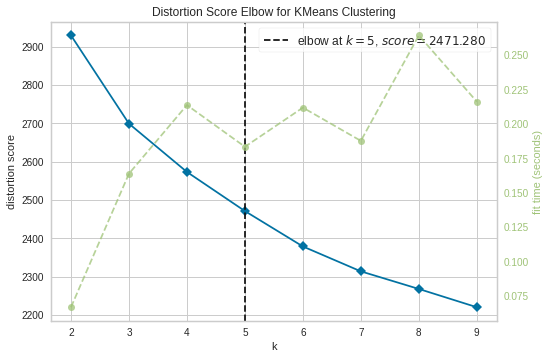

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [315]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model, k=(2,10))
# Fit the data to the visualizer
visualizer.fit(df_final.values)
# Finalize and render the figure
visualizer.show() 

In [316]:
%%time
# Initialize the K-means
kmeans_model = KMeans(n_clusters=5,random_state=42)
# Fit & predict the clusters
y_pred_cluster=kmeans_model.fit_predict(df_final)

CPU times: user 365 ms, sys: 369 ms, total: 734 ms
Wall time: 221 ms


> **Frequency of K-Means Clusters**

Text(0, 0.5, 'Cluster labels')

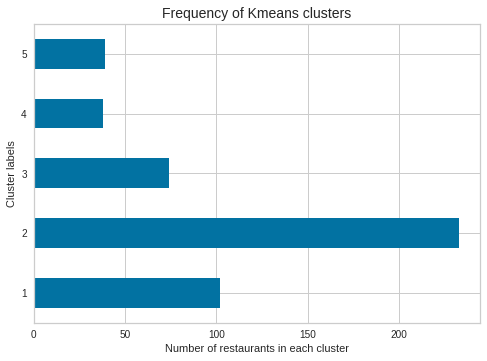

In [317]:
df_kmeans = df_new
df_kmeans["cluster"] = y_pred_cluster+1
df_kmeans.cluster.value_counts().sort_index().plot.barh()
plt.title("Frequency of Kmeans clusters", fontsize = 14)
plt.xlabel("Number of restaurants in each cluster")
plt.ylabel("Cluster labels")

In [318]:
df_kmeans.head()

Name  \
0  Playtrix Sports Bar and Cafe   
1             King of the Mambo   
2                Sapphyr Lounge   
3                  Shang Palace   
4      The Ocean, The Kingsbury   

                                            Location  \
0  137 Sir James Pieris Mawatha Colombo City Cent...   
1          Galle Face Hotel, Colombo 00300 Sri Lanka   
2  02 No 01 Galle Face Shangri-La Hotel Colombo, ...   
3  02 1 Galle Face Shangri-La Hotel, Colombo 0020...   
4        48 Janadhipathi Mawatha,, Colombo Sri Lanka   

                                             Address          PRICE RANGE  \
0  Sir James Pieris Mawatha Colombo City Centre M...     [ 500 ,   1,400]   
1                    Galle Face Hotel, Colombo 00300  [ 2,000 ,   30,000]   
2  Galle Face Shangri-La Hotel Colombo, Colombo 0...   [ 2,000 ,   5,000]   
3        Galle Face Shangri-La Hotel, Colombo 00200   [ 2,000 ,   30,000]   
4                     Janadhipathi Mawatha,, Colombo    [ 500 ,   30,000]   

                                           CUISINES  \
0                   American, Gastropub, Sri Lankan   
1  Seafood, International, Grill, Cuban, Latin, Bar   
2                               Cafe, International   
3                                           Chinese   
4                        Seafood, Asian, Sri Lankan   

                                       SPECIAL DIETS  \
0                                Vegetarian Friendly   
1  Vegetarian Friendly, Vegan Options, Gluten Fre...   
2  Vegetarian Friendly, Vegan Options, Gluten Fre...   
3  Vegetarian Friendly, Vegan Options, Gluten Fre...   
4                                Gluten Free Options   

                              Meals  \
0         Lunch, Dinner, Late Night   
1             Lunch, Dinner, Brunch   
2  Breakfast, Lunch, Dinner, Drinks   
3                     Lunch, Dinner   
4         Lunch, Dinner, Late Night   

                                            FEATURES  \
0  Takeout, Reservations, Seating, Parking Availa...   
1  Reservations, Seating, Validated Parking, Serv...   
2  Reservations, Seating, Parking Available, Vali...   
3  Takeout, Reservations, Private Dining, Seating...   
4  Reservations, Seating, Parking Available, Vali...   

                                                Link  Latitude  ...  Lunch  \
0  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...      1   
1  https://www.tripadvisor.com/Restaurant_Review-...  6.920301  ...      1   
2  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...      1   
3  https://www.tripadvisor.com/Restaurant_Review-...  6.916700  ...      1   
4  https://www.tripadvisor.com/Restaurant_Review-...  6.932970  ...      1   

   Breakfast  Drinks  Dinner  Late Night  Budget  Low  Medium  High  cluster  
0          0       0       1           1     Low    1       0     0        5  
1          0       0       1           0  Medium    0       1     0        3  
2          1       1       1           0     Low    1       0     0        3  
3          0       0       1           0  Medium    0       1     0        3  
4          0       0       1           1  Medium    0       1     0        3  

[5 rows x 131 columns]

>  **K-means Clustering analysis**

In [319]:
# Create a dataframe for each cluster
df1_kmeans = df_kmeans[df_kmeans['cluster']==1].reset_index(drop=True)
df2_kmeans = df_kmeans[df_kmeans['cluster']==2].reset_index(drop=True)
df3_kmeans = df_kmeans[df_kmeans['cluster']==3].reset_index(drop=True)
df4_kmeans = df_kmeans[df_kmeans['cluster']==4].reset_index(drop=True)
df5_kmeans = df_kmeans[df_kmeans['cluster']==5].reset_index(drop=True)

Text(0, 0.5, 'Number of restaurants')

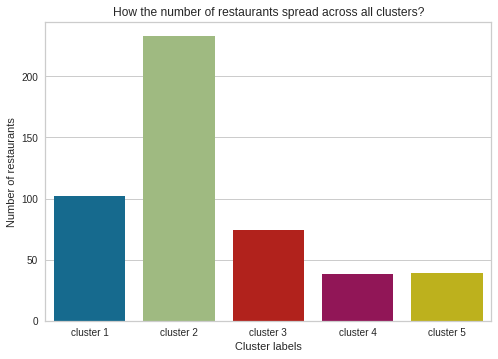

In [320]:
# How the number of restaurants spread across all clusters
no_restaurants = [len(df1_kmeans),len(df2_kmeans),len(df3_kmeans),len(df4_kmeans),len(df5_kmeans)]
cluster_labels = ['cluster 1','cluster 2','cluster 3', 'cluster 4','cluster 5']
sns.barplot(x=cluster_labels,y=no_restaurants)
plt.title('How the number of restaurants spread across all clusters?')
plt.xlabel('Cluster labels')
plt.ylabel('Number of restaurants')

Let's check the which are the restaurants in which cluster.

In [321]:
df1_kmeans

Name  \
0                  Plus Nine Four   
1            Ramen Misoya Colombo   
2                       Yue Chuan   
3                         Epicure   
4    Chambers At Park Street Mews   
..                            ...   
97                     Chopsticks   
98                 Kang's Kitchen   
99              Kinjou Restaurant   
100        The Biryani Restaurant   
101           Grand Slam by Mitsi   

                                              Location  \
0         35 D S Fonseka Road, Colombo 00500 Sri Lanka   
1    Reid Avenue Race Course Promenade, Colombo 000...   
2     48 Janadhipathi Mawatha, Colombo 00100 Sri Lanka   
3    7 65 B Gregory's Road, Colombo Next door to th...   
4         48 D, Park Street D, Colombo 00200 Sri Lanka   
..                                                 ...   
97       317/1, Nawala Road, Nawala, Colombo Sri Lanka   
98      28/1 Horton Place Colombo 7, Colombo Sri Lanka   
99           33 Amarasekara Mawatha, Colombo Sri Lanka   
100    No 33 Armour Street Junction, Colombo Sri Lanka   
101  Sir Marcus Fernando Road, Colombo 00700 Sri Lanka   

                                               Address         PRICE RANGE  \
0                     D S Fonseka Road, Colombo 00500     [ 200 ,   1,500]   
1    Reid Avenue Race Course Promenade, Colombo 00000     [ 989 ,   3,956]   
2                  Janadhipathi Mawatha, Colombo 00100  [ 1000 ,   30 000]   
3    B Gregory's Road, Colombo Next door to the Swi...    [ 396 ,   2,374]   
4                     D, Park Street D, Colombo 00200   [ 1000 ,   30 000]   
..                                                 ...                 ...   
97                        Nawala Road, Nawala, Colombo    [1,500 ,  2,500]   
98                    Horton Place Colombo 7, Colombo     [1,500 ,  2,500]   
99                        Amarasekara Mawatha, Colombo   [9,891 ,  19,782]   
100                    Armour Street Junction, Colombo    [1,500 ,  2,500]   
101            Sir Marcus Fernando Road, Colombo 00700    [ 750 ,   1,500]   

                                              CUISINES  \
0                                         Cafe, Fusion   
1                                      Japanese, Asian   
2                                       Chinese, Asian   
3          Contemporary, Healthy, International, Grill   
4           Lebanese, Moroccan, Middle Eastern, Arabic   
..                                                 ...   
97                                      Chinese, Asian   
98                               Asian, Korean, Fusion   
99                            Chinese, Asian, Japanese   
100                                             Indian   
101  Italian, Bar, Pizza, Pub, Wine Bar, Beer resta...   

                                         SPECIAL DIETS  \
0    Vegetarian Friendly, Vegan Options, Gluten Fre...   
1                   Vegetarian Friendly, Vegan Options   
2                                  Vegetarian Friendly   
3    Vegetarian Friendly, Vegan Options, Gluten Fre...   
4            Vegetarian Friendly, Vegan Options, Halal   
..                                                 ...   
97                  Vegetarian Friendly, Vegan Options   
98                  Vegetarian Friendly, Vegan Options   
99                  Vegetarian Friendly, Vegan Options   
100                 Vegetarian Friendly, Vegan Options   
101                 Vegetarian Friendly, Vegan Options   

                                 Meals  \
0             Breakfast, Lunch, Brunch   
1                        Lunch, Dinner   
2                        Lunch, Dinner   
3    Lunch, Dinner, Brunch, Late Night   
4                        Lunch, Dinner   
..                                 ...   
97                       Dinner, Lunch   
98                       Lunch, Dinner   
99                       Lunch, Dinner   
100                      Lunch, Dinner   
101      Lunch, Dinner, Brunch, Drinks   

                                              FEATU

In [326]:
# Check cluster 1 features
df1_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES','Budget']]

Name  \
0                  Plus Nine Four   
1            Ramen Misoya Colombo   
2                       Yue Chuan   
3                         Epicure   
4    Chambers At Park Street Mews   
..                            ...   
97                     Chopsticks   
98                 Kang's Kitchen   
99              Kinjou Restaurant   
100        The Biryani Restaurant   
101           Grand Slam by Mitsi   

                                              CUISINES  \
0                                         Cafe, Fusion   
1                                      Japanese, Asian   
2                                       Chinese, Asian   
3          Contemporary, Healthy, International, Grill   
4           Lebanese, Moroccan, Middle Eastern, Arabic   
..                                                 ...   
97                                      Chinese, Asian   
98                               Asian, Korean, Fusion   
99                            Chinese, Asian, Japanese   
100                                             Indian   
101  Italian, Bar, Pizza, Pub, Wine Bar, Beer resta...   

                                         SPECIAL DIETS  \
0    Vegetarian Friendly, Vegan Options, Gluten Fre...   
1                   Vegetarian Friendly, Vegan Options   
2                                  Vegetarian Friendly   
3    Vegetarian Friendly, Vegan Options, Gluten Fre...   
4            Vegetarian Friendly, Vegan Options, Halal   
..                                                 ...   
97                  Vegetarian Friendly, Vegan Options   
98                  Vegetarian Friendly, Vegan Options   
99                  Vegetarian Friendly, Vegan Options   
100                 Vegetarian Friendly, Vegan Options   
101                 Vegetarian Friendly, Vegan Options   

                                 Meals  \
0             Breakfast, Lunch, Brunch   
1                        Lunch, Dinner   
2                        Lunch, Dinner   
3    Lunch, Dinner, Brunch, Late Night   
4                        Lunch, Dinner   
..                                 ...   
97                       Dinner, Lunch   
98                       Lunch, Dinner   
99                       Lunch, Dinner   
100                      Lunch, Dinner   
101      Lunch, Dinner, Brunch, Drinks   

                                              FEATURES  Budget  
0    Takeout, Outdoor Seating, Seating, Table Servi...     Low  
1    Takeout, Reservations, Parking Available, Free...     Low  
2    Reservations, Private Dining, Seating, Validat...  Medium  
3    Reservations, Seating, Street Parking, Free of...     Low  
4    Takeout, Reservations, Seating, Accepts Credit...  Medium  
..                                                 ...     ...  
97   Takeout, Seating, Serves Alcohol, Delivery, Re...     Low  
98   Delivery, Takeout, Reservations, Private Dinin...     Low  
99                              Seating, Table Service  Medium  
100  Delivery, Takeout, Reservations, Private Dinin...     Low  
101  Delivery, Takeout, Reservations, Private Dinin...     Low  

[102 rows x 6 columns]

In [324]:
# Check cluster 2 features
df2_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES','Budget']]

Name  \
0                              Momo's by Ruvi   
1    The t-Lounge on Chatham Street by Dilmah   
2                                   Life Food   
3                                     Geek HQ   
4                                Kiku Colombo   
..                                        ...   
228                              H. Brother's   
229                            Coffee Colombo   
230                         The Chaat Company   
231                                Malar Cafe   
232                       Bombay Sweet Centre   

                                              CUISINES  \
0                                       Chinese, Asian   
1                                                 Cafe   
2                                Fusion, Healthy, Cafe   
3              Chinese, Japanese, American, Sri Lankan   
4                     Japanese, European, Fusion, Cafe   
..                                                 ...   
228                          Indian, Asian, Sri Lankan   
229  Italian, Pizza, Cafe, Fast Food, Asian, Sri La...   
230                          Indian, Asian, Sri Lankan   
231                                  Asian, Sri Lankan   
232                                  Asian, Sri Lankan   

                                         SPECIAL DIETS  \
0                   Vegetarian Friendly, Vegan Options   
1                                  Vegetarian Friendly   
2    Vegetarian Friendly, Vegan Options, Gluten Fre...   
3                                  Vegetarian Friendly   
4                   Vegetarian Friendly, Vegan Options   
..                                                 ...   
228                 Vegetarian Friendly, Vegan Options   
229                 Vegetarian Friendly, Vegan Options   
230                 Vegetarian Friendly, Vegan Options   
231                 Vegetarian Friendly, Vegan Options   
232                 Vegetarian Friendly, Vegan Options   

                                                 Meals  \
0                                        Lunch, Dinner   
1                             Breakfast, Lunch, Brunch   
2                      Takeout, Seating, Table Service   
3                                        Lunch, Dinner   
4                             Lunch, Breakfast, Dinner   
..                                                 ...   
228                           Breakfast, Lunch, Dinner   
229  Breakfast, Lunch, Dinner, Brunch, Late Night, ...   
230                                      Lunch, Dinner   
231                                      Lunch, Dinner   
232                                      Lunch, Dinner   

                                              FEATURES Budget  
0    Takeout, Seating, Wheelchair Accessible, Deliv...    Low  
1                    Seating, Free Wifi, Table Service    Low  
2                      Takeout, Seating, Table Service    Low  
3                      Takeout, Seating, Table Service    Low  
4         Seating, Accepts Credit Cards, Table Service    Low  
..                                                 ...    ...  
228                             Seating, Table Service    Low  
229                             Seating, Table Service    Low  
230                             Seating, Table Service    Low  
231                             Seating, Table Service    Low  
232                             Seating, Table Service    Low  

[233 rows x 6 columns]

In [327]:
 # Check cluster 3 features
df3_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES','Budget']]

Name  \
0              King of the Mambo   
1                 Sapphyr Lounge   
2                   Shang Palace   
3       The Ocean, The Kingsbury   
4                 Kings Steakbar   
..                           ...   
69                     RE.PUB.LK   
70                  Harbour Room   
71          The Sandwich Factory   
72  Playtrix Sports Bar and Cafe   
73                  Cafe Colombo   

                                            CUISINES  \
0   Seafood, International, Grill, Cuban, Latin, Bar   
1                                Cafe, International   
2                                            Chinese   
3                         Seafood, Asian, Sri Lankan   
4                                      Bar, European   
..                                               ...   
69                                          Bar, Pub   
70                        Sri Lankan, Seafood, Asian   
71       American, Fast Food, Diner, Fusion, Healthy   
72                   American, Gastropub, Sri Lankan   
73                                 Bar, Seafood, Pub   

                                        SPECIAL DIETS  \
0   Vegetarian Friendly, Vegan Options, Gluten Fre...   
1   Vegetarian Friendly, Vegan Options, Gluten Fre...   
2   Vegetarian Friendly, Vegan Options, Gluten Fre...   
3                                 Gluten Free Options   
4            Gluten Free Options, Vegetarian Friendly   
..                                                ...   
69  Vegetarian Friendly, Vegan Options, Gluten Fre...   
70  Vegetarian Friendly, Vegan Options, Gluten Fre...   
71                         Vegetarian Friendly, Halal   
72                                Vegetarian Friendly   
73                 Vegetarian Friendly, Vegan Options   

                                                Meals  \
0                               Lunch, Dinner, Brunch   
1                    Breakfast, Lunch, Dinner, Drinks   
2                                       Lunch, Dinner   
3                           Lunch, Dinner, Late Night   
4                                       Lunch, Dinner   
..                                                ...   
69                                             Dinner   
70                           Dinner, Breakfast, Lunch   
71                           Breakfast, Lunch, Dinner   
72                           Breakfast, Lunch, Dinner   
73  Breakfast, Lunch, Dinner, Brunch, Late Night, ...   

                                             FEATURES  Budget  
0   Reservations, Seating, Validated Parking, Serv...  Medium  
1   Reservations, Seating, Parking Available, Vali...     Low  
2   Takeout, Reservations, Private Dining, Seating...  Medium  
3   Reservations, Seating, Parking Available, Vali...  Medium  
4   Reservations, Seating, 有泊車位, Wheelchair Access...  Medium  
..                                                ...     ...  
69  Reservations, Seating, Serves Alcohol, Full Ba...  Medium  
70  Reservations, Seating, Validated Parking, Serv...  Medium  
71  Outdoor Seating, Seating, Serves Alcohol, Full...     Low  
72  Outdoor Seating, Seating, Serves Alcohol, Full...     Low  
73  Reservations, Outdoor Seating, Private Dining,...     Low  

[74 rows x 6 columns]

In [328]:
# Check cluster 4 features
df4_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES','Budget']]

Name  \
0                      Oak Ray Flower Drum Restaurant   
1                                                Isso   
2                                        Dolce Italia   
3                           Calorie Counter Colombo 7   
4                                          The Sizzle   
5                                     Arabian Knights   
6                                 Milk and Honey Cafe   
7                                      The VoV (VoV7)   
8                                 Michaelangelo Pizza   
9                                          Tea Breeze   
10                                       Peach Valley   
11                             London House of Coffee   
12                                     Paan Paan Cafe   
13                                            Pebbles   
14                      Okra Kitchen by Ravi & Sepali   
15                         Mintage Restaurant and Pub   
16                                 Light House Galley   
17                                       TGI Friday's   
18                              Cloud9 Rooftop Lounge   
19                                          Choco Luv   
20  Singhalease Sports Club - Restautant, Bar and ...   
21                                            Flavors   
22                       Playtrix Sports Bar and Cafe   
23                                 Zylan Luxury Villa   
24                       Indo Ceylon Cafe & Dosa King   
25                          Fazly's Halal Refreshment   
26                           Shiwu Chinese Restaurant   
27                         Navayuga Indian Restaurant   
28                                        Spice Coast   
29                             RAMEN HAMAKAZE Colombo   
30                                          Sushi Bar   
31                                        The Embazzy   
32                    Crossroads  Café and Restaurant   
33                           The Gardenia Coffee Shop   
34                                         La Veranda   
35                           3Brothers Italian Bistro   
36                                          Fat Panda   
37                             TosakanthíS Rosat Paan   

                                             CUISINES  \
0                              Chinese, Asian, Fusion   
1                          Seafood, Asian, Sri Lankan   
2                                       Italian, Cafe   
3                       International, Grill, Healthy   
4                                              Indian   
5                            Middle Eastern, Lebanese   
6                                                Cafe   
7   Italian, American, Cafe, Asian, Diner, Sri Lankan   
8                                      Pizza, Italian   
9                                                Cafe   
10                                     Chinese, Asian   
11                                               Cafe   
12                                               Deli   
13                               Cafe, Fast Food, Pub   
14                                  Asian, Sri Lankan   
15                           Chinese, Bar, Asian, Pub   
16                                Chinese, Sri Lankan   
17                          American, Steakhouse, Bar   
18               Bar, Barbecue, Fusion, Wine Bar, Pub   
19                                    Cafe, Fast Food   
20                                           Bar, Pub   
21                                             Indian   
22                    American, Gastropub, Sri Lankan   
23                             Japanese, Asian, Sushi   
24                                 Indian, Sri Lankan   
25                                          Fast Food   
26                                     Chinese, Asian   
27                                      Indian, Asian   
28                    Indian, Asian, Thai, Sri Lankan   
29                      Japanese, Asian, Diner, Soups   
30                             Japanese, Sushi, Asian   
3

In [329]:
#  Check cluster 5 features
df5_kmeans[['Name','CUISINES','SPECIAL DIETS','Meals','FEATURES','Budget']]

Name  \
0     Playtrix Sports Bar and Cafe   
1                             FLOW   
2                            L.A.B   
3                    Graze Kitchen   
4                       Curry Leaf   
5                         Il Ponte   
6                      Cafe Kumbuk   
7              Sea Fish Restaurant   
8                   Flamingo House   
9                       Cafe Shaze   
10               rare at Residence   
11                         Upali's   
12           Indian Summer Colombo   
13                    Black Pepper   
14    Playtrix Sports Bar and Cafe   
15     Park Street Mews Restaurant   
16              Mitsi's Delicacies   
17       Flavoured at Cinnamon Red   
18           Park Street Trattoria   
19                       Cloud Red   
20                    The Fat Crab   
21                  The Barnesbury   
22                     The Bayleaf   
23                    Beach Wadiya   
24                    Cafe Beverly   
25               Colombo Fort Cafe   
26                   Café Français   
27                       Tsing Tao   
28                  Tsukiji Uoichi   
29  Asylum Restaurant & Lounge Bar   
30                 Loft Lounge Bar   
31   Stella Karaoke Lounge and Bar   
32         Havelock Place Bungalow   
33    Playtrix Sports Bar and Cafe   
34                  The Manchester   
35                      Yarl Hotel   
36                       Pizza Hut   
37                  Cafe Bagatalle   
38                           Curve   

                                             CUISINES  \
0                     American, Gastropub, Sri Lankan   
1                                          Sri Lankan   
2                                 Bar, Cafe, Wine Bar   
3   Italian, Chinese, Indian, International, Sushi...   
4                                 Seafood, Sri Lankan   
5             Italian, Pizza, Mediterranean, European   
6                                       Cafe, Healthy   
7           International, Sri Lankan, Seafood, Asian   
8            Bar, Fusion, European, Asian, Sri Lankan   
9                                  American, European   
10  International, Fusion, European, Asian, Sri La...   
11                                  Asian, Sri Lankan   
12                              Indian, Asian, Fusion   
13                         Seafood, Asian, Sri Lankan   
14                    American, Gastropub, Sri Lankan   
15                            European, International   
16                                     Cafe, European   
17                   International, Sri Lankan, Asian   
18            Italian, Pizza, Mediterranean, European   
19                                  Contemporary, Bar   
20                         Seafood, Asian, Sri Lankan   
21                               Sri Lankan, European   
22                                            Italian   
23                                         Sri Lankan   
24                          Indian, Cafe, Asian, Thai   
25                         Cafe, European, Sri Lankan   
26   French, Cafe, International, European, Gastropub   
27                                     Chinese, Asian   
28                    Sushi, Japanese, Asian, Seafood   
29                              Bar, European, Fusion   
30                                                Bar   
31                                           Bar, Pub   
32                          Sri Lankan, Asian, Fusion   
33                    American, Gastropub, Sri Lankan   
34                            Bar, Pub, International   
35                 Asian, Sri Lankan, Indian, Seafood   
36                          Italian, Pizza, Fast Food   
37  American, Cafe, International, Sri Lankan, Asi...   
38                                                Bar   

                                        SPECIAL DIETS  \
0                                 Vegetarian Friendly   
1   Vegetarian Friendly, Vegan Options, Gluten Fre...   
2   Vegetarian Friendly, Vegan Options, Gluten Fre...   


>  **Let's check unique items in each feature in cluster 1.**

In [330]:
# unique cuisines in cluster 1
unique1_cuisines = unique_items(df1_kmeans['CUISINES'])
unique1_cuisines

['Seafood',
 'Contemporary',
 'Indian',
 'European',
 'Polynesian',
 'Mediterranean',
 'Middle Eastern',
 'Sri Lankan',
 'Grill',
 'Wine Bar',
 'Korean',
 'Beer restaurants',
 'Lebanese',
 'Malaysian',
 'Mexican',
 'International',
 'Fast Food',
 'American',
 'Moroccan',
 'Spanish',
 'Thai',
 'Barbecue',
 'Sushi',
 'Cajun & Creole',
 'Arabic',
 'Fusion',
 'Healthy',
 'Scottish',
 'Caribbean',
 'Steakhouse',
 'Asian',
 'British',
 'Chinese',
 'Singaporean',
 'Dining bars',
 'Japanese',
 'Pub',
 'Italian',
 'Pizza',
 'Bar',
 'Vietnamese',
 'Cafe',
 'Soups']

In [331]:
# unique special diets in cluster 1
unique1_SPECIAL_DIETS = unique_items(df1_kmeans['SPECIAL DIETS'])
unique1_SPECIAL_DIETS

['Vegan Options', 'Gluten Free Options', 'Halal', 'Vegetarian Friendly']

In [332]:
# unique meals in cluster 1
unique1_Meals = unique_items(df1_kmeans['Meals'])
unique1_Meals

['Brunch', 'Breakfast', 'Dinner', 'Drinks', 'Lunch', 'Late Night']

In [333]:
# unique FEATURES in cluster 1
unique1_FEATURES = unique_items(df1_kmeans['FEATURES'])
unique1_FEATURES

['Wine and Beer',
 'Serves Alcohol',
 'BYOB',
 'Seating',
 'Delivery',
 'Highchairs Available',
 'Parking Available',
 'Reservations',
 'Cash Only',
 'Dog Friendly',
 'Wheelchair Accessible',
 'Free Wifi',
 'Validated Parking',
 'Family style',
 'Non-smoking restaurants',
 'Full Bar',
 'Takeout',
 'Free off-street parking',
 'Television',
 'Street Parking',
 'Accepts Mastercard',
 'Waterfront',
 'Valet Parking',
 'Outdoor Seating',
 'Accepts Credit Cards',
 'Private Dining',
 'Table Service',
 'Buffet',
 'Live Music',
 'Accepts Visa']

>  **Let's check unique items in each feature in cluster 2.**

In [334]:
# unique cuisines in cluster 2
unique2_cuisines = unique_items(df2_kmeans['CUISINES'])
unique2_cuisines

['Seafood',
 'Gastropub',
 'Indian',
 'Contemporary',
 'European',
 'Mediterranean',
 'Middle Eastern',
 'Sri Lankan',
 'Grill',
 'Fujian',
 'Lebanese',
 'Malaysian',
 'Mexican',
 'Pakistani',
 'Southwestern',
 'Fast Food',
 'International',
 'Japanese Fusion',
 'American',
 'Diner',
 'Mongolian',
 'Portuguese',
 'Thai',
 'Barbecue',
 'Sushi',
 'Arabic',
 'African',
 'Fusion',
 'Indonesian',
 'Healthy',
 'Turkish',
 'German',
 'Steakhouse',
 'Asian',
 'British',
 'Chinese',
 'Singaporean',
 'Street Food',
 'Afghani',
 'Japanese',
 'Pub',
 'Italian',
 'Pizza',
 'Bar',
 'Cafe',
 'Central-Italian',
 'French']

In [335]:
# unique SPECIAL DIETS in cluster 2
unique2_SPECIAL_DIETS = unique_items(df2_kmeans['SPECIAL DIETS'])
unique2_SPECIAL_DIETS

['Vegan Options', 'Gluten Free Options', 'Halal', 'Vegetarian Friendly']

In [336]:
# unique Meals in cluster 2
unique2_Meals = unique_items(df2_kmeans['Meals'])
unique2_Meals

['Brunch',
 'Seating',
 'Table Service',
 'Lunch',
 'Drinks',
 'Breakfast',
 'Takeout',
 'Dinner',
 'Late Night']

In [337]:
# unique FEATURES in cluster 2
unique2_FEATURES = unique_items(df2_kmeans['FEATURES'])
unique2_FEATURES

['Outdoor Seating',
 'Serves Alcohol',
 'Accepts Credit Cards',
 'BYOB',
 'Seating',
 'Table Service',
 'Delivery',
 'Reservations',
 'Wheelchair Accessible',
 'Free Wifi',
 'Buffet',
 'Takeout',
 'Television',
 'Street Parking']

> **Let's check unique items in each feature in cluster 3.**

In [338]:
# unique cuisines in cluster 3
unique3_cuisines = unique_items(df3_kmeans['CUISINES'])
unique3_cuisines

['Seafood',
 'Gastropub',
 'Vegetarian Friendly',
 'Indian',
 'Contemporary',
 'European',
 'Mediterranean',
 'Middle Eastern',
 'Sri Lankan',
 'Grill',
 'Wine Bar',
 'Cuban',
 'Malaysian',
 'Mexican',
 'Irish',
 'International',
 'Fast Food',
 'Australian',
 'American',
 'Diner',
 'Southern-Italian',
 'Thai',
 'Gluten Free Options',
 'Sicilian',
 'Vegan Options',
 'Fusion',
 'Healthy',
 'Latin',
 'German',
 'Steakhouse',
 'Asian',
 'British',
 'Central European',
 'Chinese',
 'Japanese',
 'Pub',
 'Italian',
 'Pizza',
 'Bar',
 'Vietnamese',
 'Cafe']

In [339]:
# unique SPECIAL DIETS in cluster 3
unique3_SPECIAL_DIETS = unique_items(df3_kmeans['SPECIAL DIETS'])
unique3_SPECIAL_DIETS

['Gluten Free Options',
 'Halal',
 'Vegetarian Friendly',
 'Vegan Options',
 'Kosher']

In [340]:
# unique Meals in cluster 3
unique3_Meals = unique_items(df3_kmeans['Meals'])
unique3_Meals

['Brunch', 'Breakfast', 'Dinner', 'Drinks', 'Lunch', 'Late Night']

In [341]:
# unique FEATURES in cluster 3
unique3_FEATURES = unique_items(df3_kmeans['FEATURES'])
unique3_FEATURES

['Wine and Beer',
 'Serves Alcohol',
 'Jazz Bar',
 'Seating',
 'Delivery',
 'Highchairs Available',
 'Parking Available',
 'Reservations',
 'Digital Payments',
 'Wheelchair Accessible',
 'Free Wifi',
 'Validated Parking',
 'Family style',
 'Full Bar',
 'Takeout',
 'Free off-street parking',
 'Television',
 'Waterfront',
 'Street Parking',
 'Valet Parking',
 'Outdoor Seating',
 'Accepts Credit Cards',
 'Private Dining',
 'Table Service',
 'Gift Cards Available',
 'Buffet',
 '有泊車位',
 'Live Music']

> **Let's check unique items in each feature in cluster 4.**

In [342]:
# unique cuisines in cluster 4
unique4_cuisines = unique_items(df4_kmeans['CUISINES'])
unique4_cuisines

['Barbecue',
 'Seafood',
 'Gastropub',
 'Sushi',
 'Indian',
 'Arabic',
 'Fusion',
 'Deli',
 'Healthy',
 'Middle Eastern',
 'Sri Lankan',
 'Grill',
 'Wine Bar',
 'Steakhouse',
 'Asian',
 'Chinese',
 'Lebanese',
 'Japanese',
 'Pub',
 'Italian',
 'Pizza',
 'International',
 'Fast Food',
 'Bar',
 'American',
 'Cafe',
 'Diner',
 'Soups',
 'Thai']

In [343]:
# unique SPECIAL DIETS in cluster 4
unique4_SPECIAL_DIETS = unique_items(df4_kmeans['SPECIAL DIETS'])
unique4_SPECIAL_DIETS

['Gluten Free Options',
 'Halal',
 'Vegetarian Friendly',
 'Vegan Options',
 'Nonveg']

In [344]:
# unique Meals in cluster 4
unique4_Meals = unique_items(df4_kmeans['Meals'])
unique4_Meals

['Brunch', 'Breakfast', 'Dinner', 'Drinks', 'Lunch', 'Late Night']

In [345]:
# unique FEATURES in cluster 4
unique4_FEATURES = unique_items(df4_kmeans['FEATURES'])
unique4_FEATURES

['Serves Alcohol',
 'Accepts American Express',
 'Seating',
 'Delivery',
 'Highchairs Available',
 'Parking Available',
 'Reservations',
 'Cash Only',
 'Accepts Discover',
 'Digital Payments',
 'Wheelchair Accessible',
 'Free Wifi',
 'Validated Parking',
 'Family style',
 'Takeout',
 'Free off-street parking',
 'Television',
 'Street Parking',
 'Accepts Mastercard',
 'Outdoor Seating',
 'Accepts Credit Cards',
 'Private Dining',
 'Table Service',
 'Accepts Visa']

> **Let's check unique items in each feature in cluster 5.**

In [346]:
# unique cuisines in cluster 5
unique5_cuisines = unique_items(df5_kmeans['CUISINES'])
unique5_cuisines

['Seafood',
 'Gastropub',
 'Sushi',
 'Indian',
 'Contemporary',
 'European',
 'Fusion',
 'Healthy',
 'Mediterranean',
 'Sri Lankan',
 'Wine Bar',
 'Asian',
 'Chinese',
 'Japanese',
 'Pub',
 'Italian',
 'Pizza',
 'International',
 'Fast Food',
 'Bar',
 'American',
 'Cafe',
 'Soups',
 'French',
 'Thai']

In [347]:
# unique SPECIAL DIETS in cluster 5
unique5_SPECIAL_DIETS = unique_items(df5_kmeans['SPECIAL DIETS'])
unique5_SPECIAL_DIETS

['Gluten Free Options',
 'Halal',
 'Vegetarian Friendly',
 'Vegan Options',
 'Nonveg']

In [348]:
# unique Meals in cluster 5
unique5_Meals = unique_items(df5_kmeans['Meals'])
unique5_Meals

['Brunch', 'Breakfast', 'Dinner', 'Drinks', 'Lunch', 'Late Night']

In [349]:
# unique FEATURES in cluster 5
unique5_FEATURES = unique_items(df5_kmeans['FEATURES'])
unique5_FEATURES

['Wine and Beer',
 'Serves Alcohol',
 'Beach',
 'Delivery',
 'Highchairs Available',
 'Parking Available',
 'Cash Only',
 'Full Bar',
 'Television',
 'Street Parking',
 'Accepts Mastercard',
 'Waterfront',
 'Outdoor Seating',
 'Private Dining',
 'akeout',
 'Accepts Visa',
 'BYOB',
 'Seating',
 'Accepts American Express',
 'Reservations',
 'Accepts Discover',
 'Digital Payments',
 'Wheelchair Accessible',
 'Free Wifi',
 'Validated Parking',
 'Takeout',
 'Free off-street parking',
 'Valet Parking',
 'Accepts Credit Cards',
 'Table Service',
 'Buffet',
 'Live Music']

>  **How unique our clusters are?**

>  **Frequency of unique items in CUISINES**

In [350]:
## Define a function to Count the occurrences of each feature in each Cluster

def count(unique_list,col,df):
    count_list = []
    for feature in unique_list:
        count = df[col].str.contains(feature,regex=True).sum()
        count_list.append(count)
    return count_list

>  ****Frequency of unique cuisines in Cluster 1****

Text(0.5, 0, 'Occurrences of cuisines')

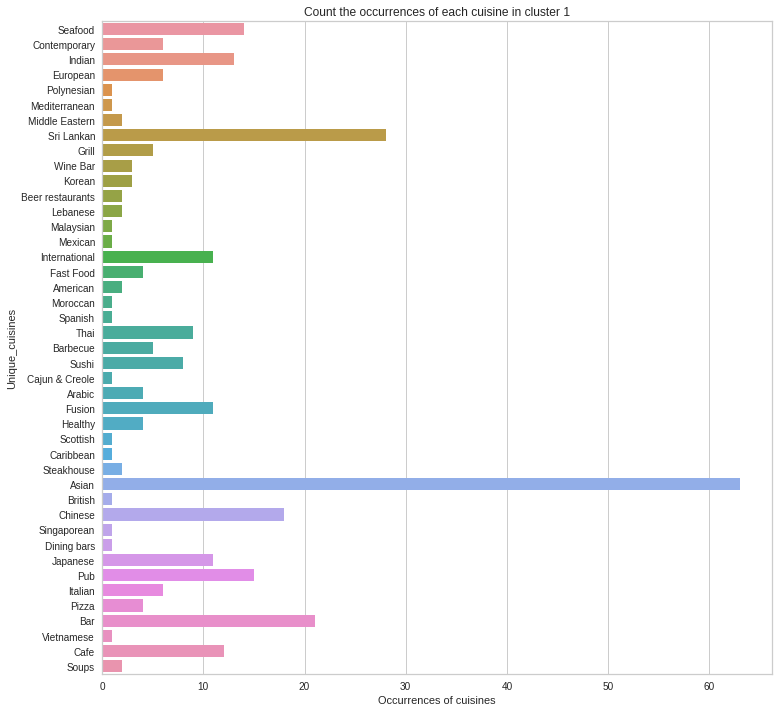

In [351]:
# Count the occurrences of each cuisine in cluster 1
cuisine_count = count(unique1_cuisines,'CUISINES',df1_kmeans)
# Create a dataframe for count & unique1_cuisines
df1_cuisines = pd.DataFrame()
df1_cuisines['unique_cuisines'] = unique1_cuisines
df1_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df1_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 1')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

>  **Frequency of unique cuisines in Cluster 2**

Text(0.5, 0, 'Occurrences of cuisines')

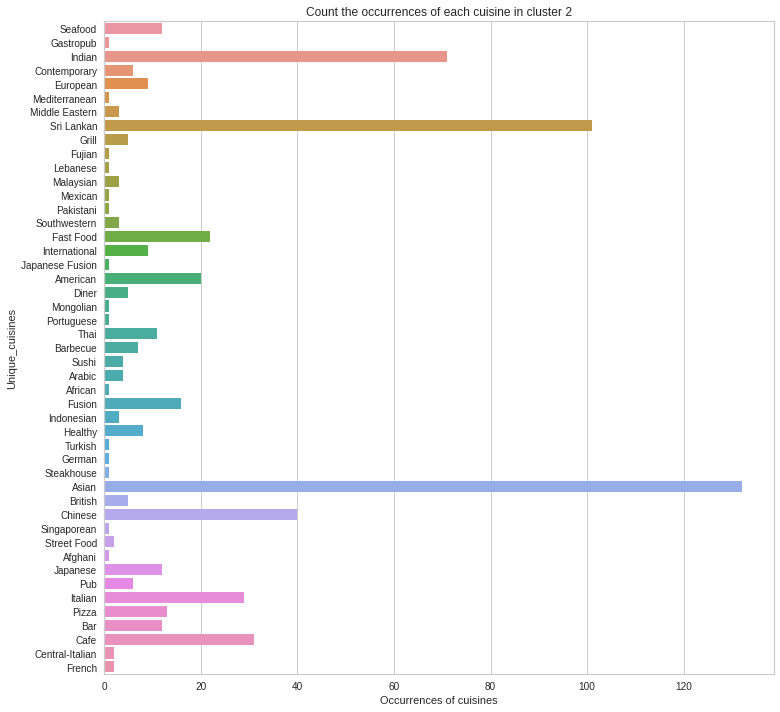

In [352]:
# Count the occurrences of each cuisine in cluster 2
cuisine_count = count(unique2_cuisines,'CUISINES',df2_kmeans)
# Create a dataframe for count & unique2_cuisines
df2_cuisines = pd.DataFrame()
df2_cuisines['unique_cuisines'] = unique2_cuisines
df2_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df2_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 2')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

>  **Frequency of unique cuisines in Cluster 3**

Text(0.5, 0, 'Occurrences of cuisines')

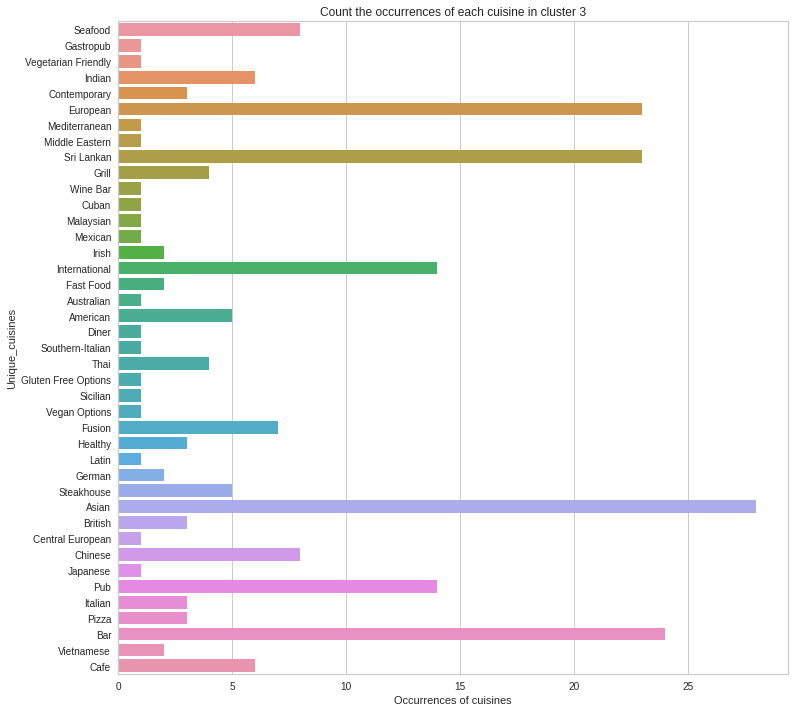

In [353]:
# Count the occurrences of each cuisine in cluster 3
cuisine_count = count(unique3_cuisines,'CUISINES',df3_kmeans)
# Create a dataframe for count & unique3_cuisines
df3_cuisines = pd.DataFrame()
df3_cuisines['unique_cuisines'] = unique3_cuisines
df3_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df3_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 3')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

>  **Frequency of unique cuisines in Cluster 4**

Text(0.5, 0, 'Occurrences of cuisines')

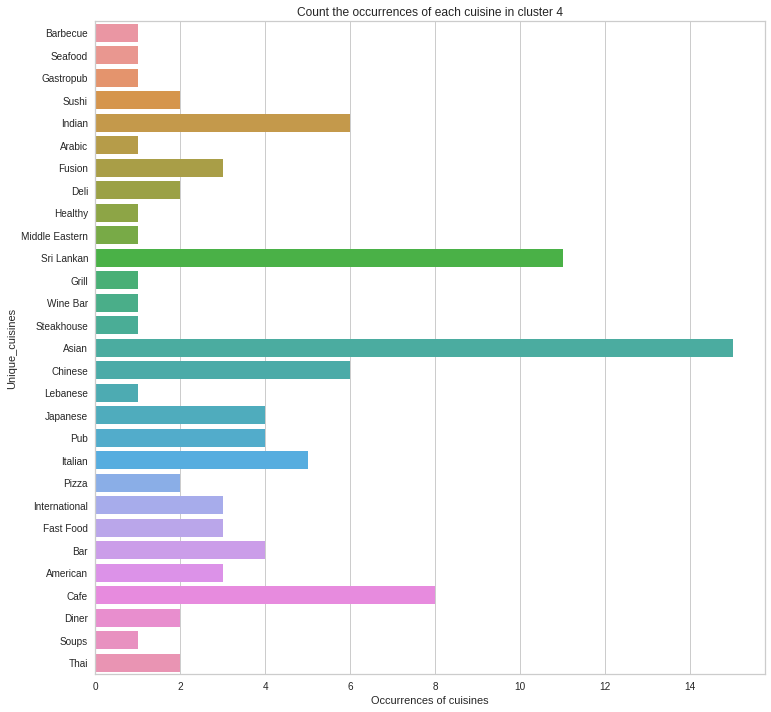

In [354]:
# Count the occurrences of each cuisine in cluster 4
cuisine_count = count(unique4_cuisines,'CUISINES',df4_kmeans)
# Create a dataframe for count & unique4_cuisines
df4_cuisines = pd.DataFrame()
df4_cuisines['unique_cuisines'] = unique4_cuisines
df4_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
ax = sns.barplot(x='cuisine_count',y='unique_cuisines',data = df4_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 4')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

> **Frequency of unique cuisines in Cluster 5**

Text(0.5, 0, 'Occurrences of cuisines')

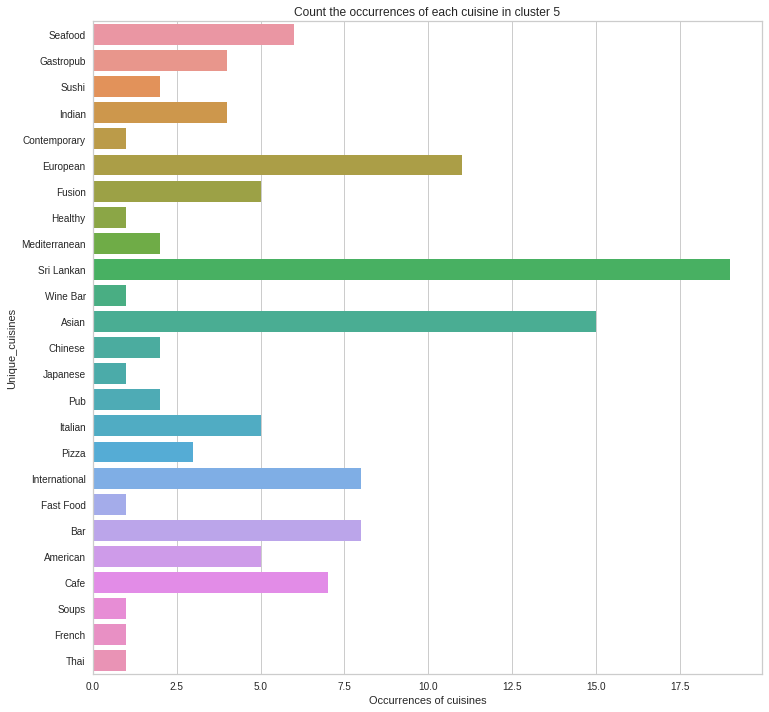

In [355]:
# Count the occurrences of each cuisine in cluster 5
cuisine_count = count(unique5_cuisines,'CUISINES',df5_kmeans)
# Create a dataframe for count & unique4_cuisines
df5_cuisines = pd.DataFrame()
df5_cuisines['unique_cuisines'] = unique5_cuisines
df5_cuisines['cuisine_count'] = cuisine_count
plt.figure(figsize=(12,12))
sns.barplot(x='cuisine_count',y='unique_cuisines',data = df5_cuisines)
plt.title('Count the occurrences of each cuisine in cluster 5')
plt.ylabel('Unique_cuisines')
plt.xlabel('Occurrences of cuisines')

> **Frequency of unique items in SPECIAL DIETS**

>  **Frequency of unique SPECIAL DIETS in Cluster 1**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

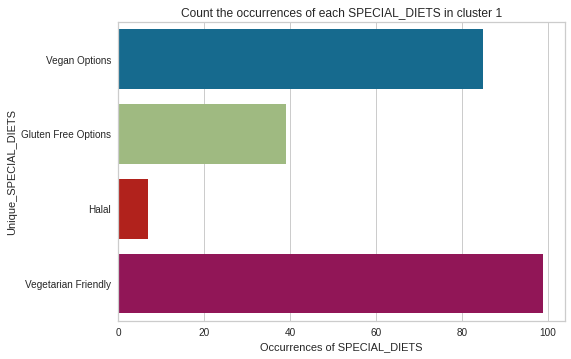

In [356]:
# Count the occurrences of each SPECIAL DIETS in cluster 1
SPECIAL_DIETS_count = count(unique1_SPECIAL_DIETS,'SPECIAL DIETS',df1_kmeans)
# Create a dataframe for count & unique1_SPECIAL DIETS
df1_SPECIAL_DIETS = pd.DataFrame()
df1_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique1_SPECIAL_DIETS
df1_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df1_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 1')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

> **Frequency of unique SPECIAL DIETS in Cluster 2**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

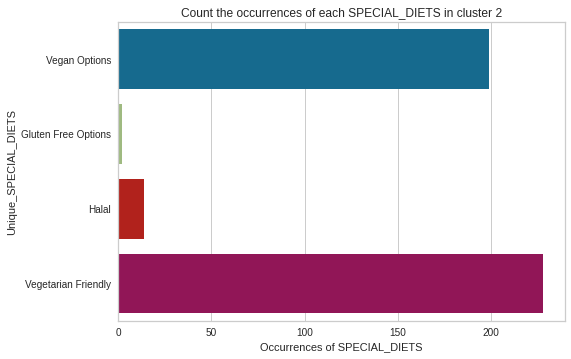

In [357]:
# Count the occurrences of each SPECIAL DIETS in cluster 1
SPECIAL_DIETS_count = count(unique2_SPECIAL_DIETS,'SPECIAL DIETS',df2_kmeans)
# Create a dataframe for count & unique2_SPECIAL DIETS
df2_SPECIAL_DIETS = pd.DataFrame()
df2_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique2_SPECIAL_DIETS
df2_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df2_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 2')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of unique SPECIAL DIETS in Cluster 3**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

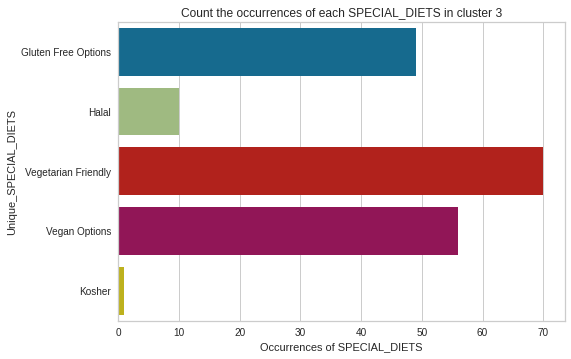

In [358]:
# Count the occurrences of each cuisine in cluster 3
SPECIAL_DIETS_count = count(unique3_SPECIAL_DIETS,'SPECIAL DIETS',df3_kmeans)
# Create a dataframe for count & unique3_cuisines
df3_SPECIAL_DIETS = pd.DataFrame()
df3_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique3_SPECIAL_DIETS
df3_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df3_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 3')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of unique SPECIAL DIETS in Cluster 4**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

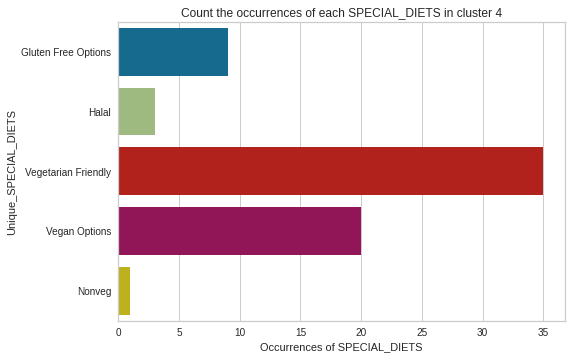

In [359]:
# Count the occurrences of each SPECIAL DIETS in cluster 4
SPECIAL_DIETS_count = count(unique4_SPECIAL_DIETS,'SPECIAL DIETS',df4_kmeans)
# Create a dataframe for count & unique4_SPECIAL DIETS
df4_SPECIAL_DIETS = pd.DataFrame()
df4_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique4_SPECIAL_DIETS
df4_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df4_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 4')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of unique SPECIAL DIETS in Cluster 5**

Text(0.5, 0, 'Occurrences of SPECIAL_DIETS')

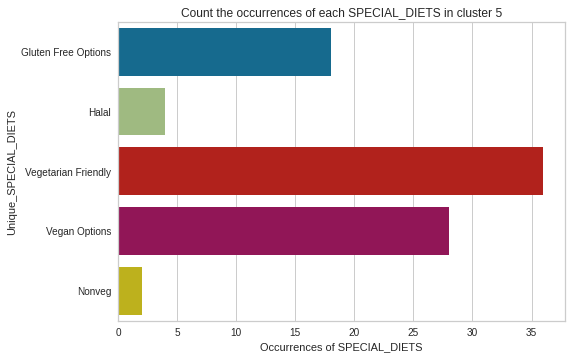

In [360]:
# Count the occurrences of each SPECIAL DIETS in cluster 5
SPECIAL_DIETS_count = count(unique5_SPECIAL_DIETS,'SPECIAL DIETS',df5_kmeans)
# Create a dataframe for count & unique5_SPECIAL DIETS
df5_SPECIAL_DIETS = pd.DataFrame()
df5_SPECIAL_DIETS['unique_SPECIAL_DIETS'] = unique5_SPECIAL_DIETS
df5_SPECIAL_DIETS['SPECIAL_DIETS_count'] = SPECIAL_DIETS_count
sns.barplot(x='SPECIAL_DIETS_count',y='unique_SPECIAL_DIETS',data = df5_SPECIAL_DIETS)
plt.title('Count the occurrences of each SPECIAL_DIETS in cluster 5')
plt.ylabel('Unique_SPECIAL_DIETS')
plt.xlabel('Occurrences of SPECIAL_DIETS')

>  **Frequency of unique items in Meals**

>  **Frequency of unique items in Meals in Cluster 1**

Text(0.5, 0, 'Occurrences of items in Meals')

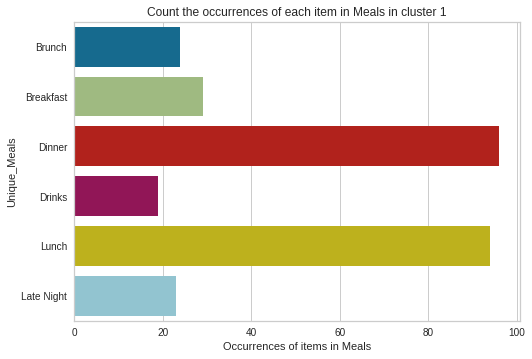

In [361]:
# Count the occurrences of each Meals in cluster 1
meals_count = count(unique1_Meals,'Meals',df1_kmeans)
# Create a dataframe for count & unique1_Meals
df1_Meals = pd.DataFrame()
df1_Meals['unique_Meals'] = unique1_Meals
df1_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df1_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 1')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 2**

Text(0.5, 0, 'Occurrences of items in Meals')

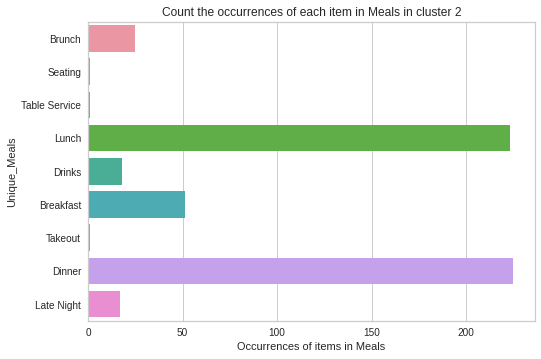

In [362]:
# Count the occurrences of each Meals in cluster 2
meals_count = count(unique2_Meals,'Meals',df2_kmeans)
# Create a dataframe for count & unique2_Meals
df2_Meals = pd.DataFrame()
df2_Meals['unique_Meals'] = unique2_Meals
df2_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df2_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 2')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 3**

Text(0.5, 0, 'Occurrences of items in Meals')

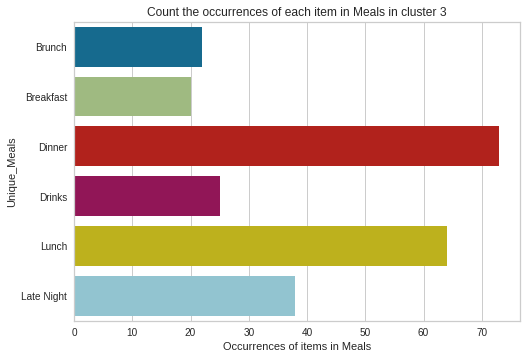

In [363]:
# Count the occurrences of each Meals in cluster 3
meals_count = count(unique3_Meals,'Meals',df3_kmeans)
# Create a dataframe for count & unique3_Meals
df3_Meals = pd.DataFrame()
df3_Meals['unique_Meals'] = unique3_Meals
df3_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df3_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 3')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 4**

Text(0.5, 0, 'Occurrences of items in Meals')

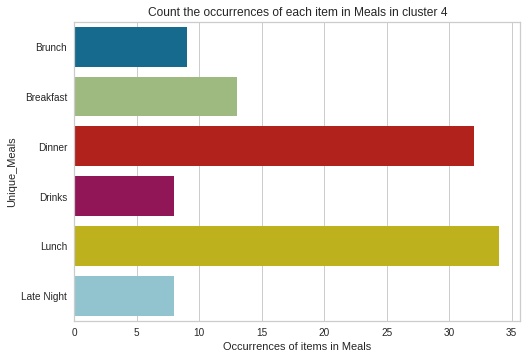

In [364]:
# Count the occurrences of each item in Meals in cluster 4
meals_count = count(unique4_Meals,'Meals',df4_kmeans)
# Create a dataframe for count & unique4_Meals
df4_Meals = pd.DataFrame()
df4_Meals['unique_Meals'] = unique4_Meals
df4_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df4_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 4')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in Meals in Cluster 5**

Text(0.5, 0, 'Occurrences of items in Meals')

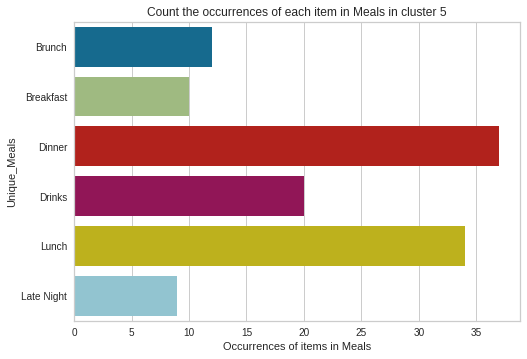

In [365]:
# Count the occurrences of each item in Meals in cluster 5
meals_count = count(unique5_Meals,'Meals',df5_kmeans)
# Create a dataframe for count & unique5_Meals
df5_Meals = pd.DataFrame()
df5_Meals['unique_Meals'] = unique5_Meals
df5_Meals['Meals_count'] = meals_count
sns.barplot(x='Meals_count',y='unique_Meals',data = df5_Meals)
plt.title('Count the occurrences of each item in Meals in cluster 5')
plt.ylabel('Unique_Meals')
plt.xlabel('Occurrences of items in Meals')

>  **Frequency of unique items in FEATURES**

>  **Frequency of unique items in FEATURES in Cluster 1**

Text(0.5, 0, 'Occurrences of items in FEATURES')

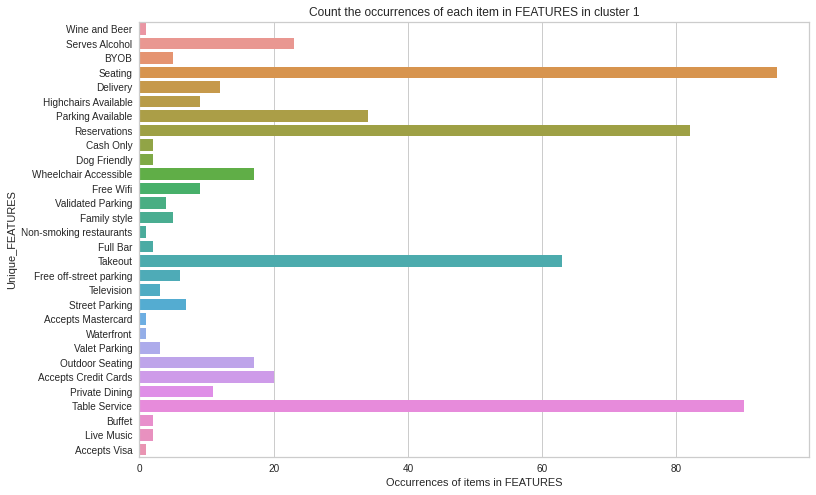

In [366]:
# Count the occurrences of each item in FEATURES in cluster 1
FEATURES_count = count(unique1_FEATURES,'FEATURES',df1_kmeans)
# Create a dataframe for count & unique1_FEATURES
df1_FEATURES = pd.DataFrame()
df1_FEATURES['unique_FEATURES'] = unique1_FEATURES
df1_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df1_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 1')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 2**

Text(0.5, 0, 'Occurrences of items in FEATURES')

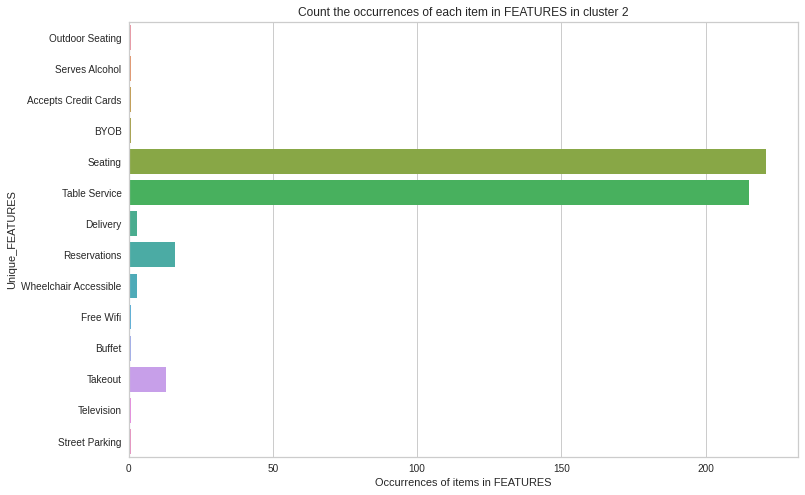

In [367]:
# Count the occurrences of each item in FEATURES in cluster 2
FEATURES_count = count(unique2_FEATURES,'FEATURES',df2_kmeans)
# Create a dataframe for count & unique1_FEATURES
df2_FEATURES = pd.DataFrame()
df2_FEATURES['unique_FEATURES'] = unique2_FEATURES
df2_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df2_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 2')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 3**

Text(0.5, 0, 'Occurrences of items in FEATURES')

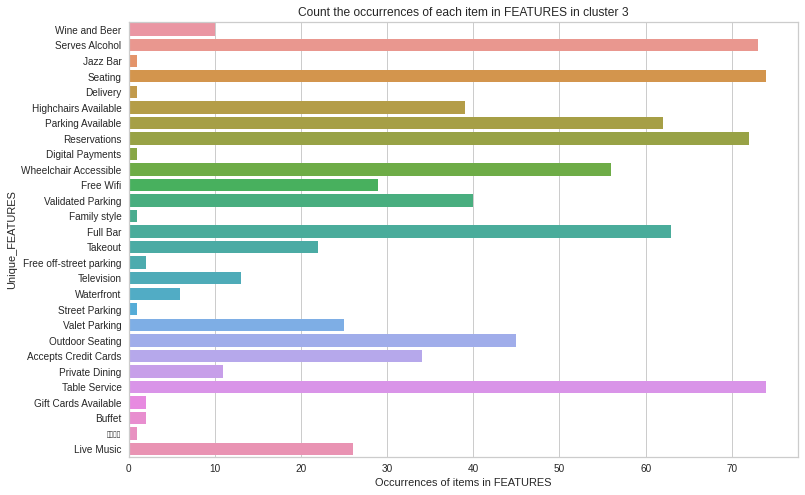

In [368]:
# Count the occurrences of each item in FEATURES in cluster 3
FEATURES_count = count(unique3_FEATURES,'FEATURES',df3_kmeans)
# Create a dataframe for count & unique3_FEATURES
df3_FEATURES = pd.DataFrame()
df3_FEATURES['unique_FEATURES'] = unique3_FEATURES
df3_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df3_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 3')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 4**

Text(0.5, 0, 'Occurrences of items in FEATURES')

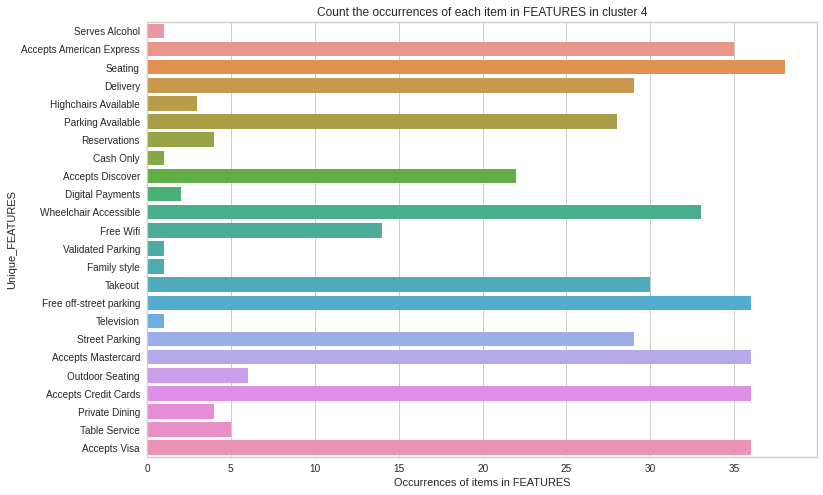

In [369]:
# Count the occurrences of each item in FEATURES in cluster 4
FEATURES_count = count(unique4_FEATURES,'FEATURES',df4_kmeans)
# Create a dataframe for count & unique4_FEATURES
df4_FEATURES = pd.DataFrame()
df4_FEATURES['unique_FEATURES'] = unique4_FEATURES
df4_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df4_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 4')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of unique items in FEATURES in Cluster 5**

Text(0.5, 0, 'Occurrences of items in FEATURES')

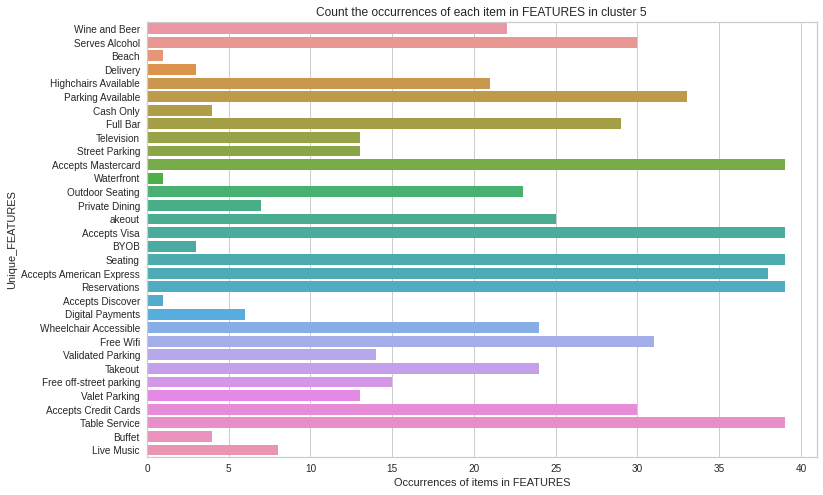

In [370]:
# Count the occurrences of each item in FEATURES in cluster 5
FEATURES_count = count(unique5_FEATURES,'FEATURES',df5_kmeans)
# Create a dataframe for count & unique5_FEATURES
df5_FEATURES = pd.DataFrame()
df5_FEATURES['unique_FEATURES'] = unique5_FEATURES
df5_FEATURES['FEATURES_count'] = FEATURES_count
plt.figure(figsize=(12,8))
sns.barplot(x='FEATURES_count',y='unique_FEATURES',data = df5_FEATURES)
plt.title('Count the occurrences of each item in FEATURES in cluster 5')
plt.ylabel('Unique_FEATURES')
plt.xlabel('Occurrences of items in FEATURES')

>  **Frequency of Budget classes**

In [371]:
unique_budget = df_new['Budget'].unique()

>  **Frequency of Budget classes in Cluster 1**

Text(0, 0.5, 'Count')

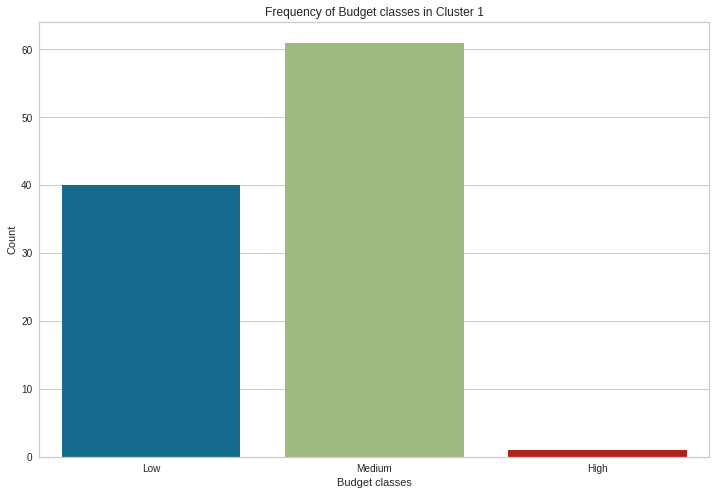

In [373]:
plt.figure(figsize=(12,8))
sns.countplot(df1_kmeans['Budget'])
plt.title('Frequency of Budget classes in Cluster 1')
plt.xlabel('Budget classes')
plt.ylabel('Count')

>  **Frequency of Budget classes in Cluster 2**

Text(0, 0.5, 'Count')

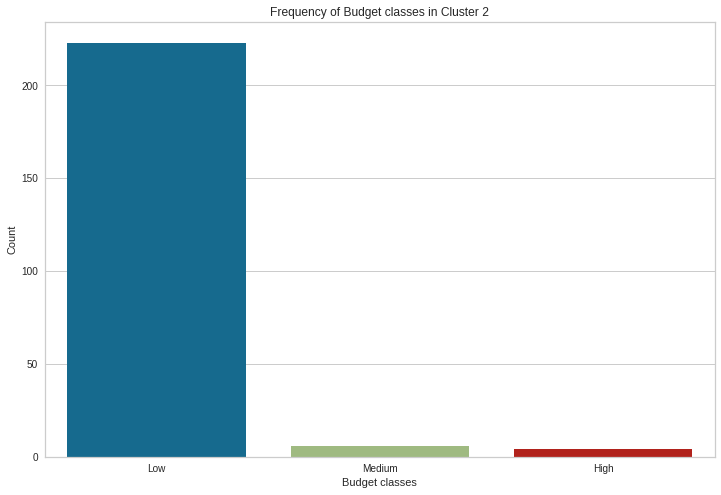

In [374]:
plt.figure(figsize=(12,8))
sns.countplot(df2_kmeans['Budget'])
plt.title('Frequency of Budget classes in Cluster 2')
plt.xlabel('Budget classes')
plt.ylabel('Count')

>  **Frequency of Budget classes in Cluster 3**

Text(0, 0.5, 'Count')

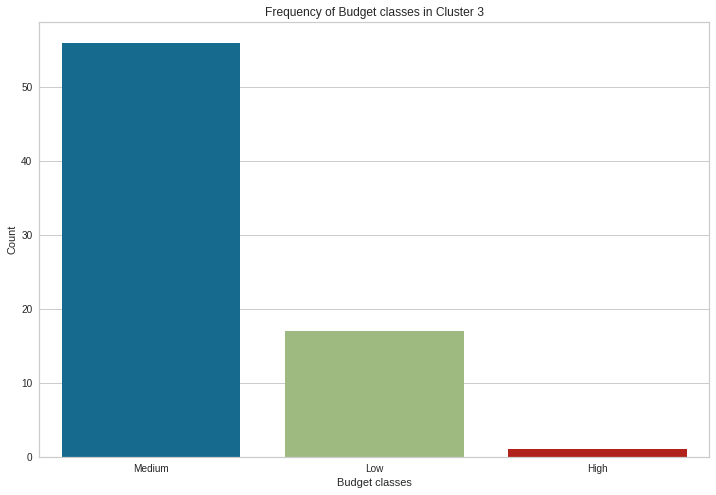

In [375]:
plt.figure(figsize=(12,8))
sns.countplot(df3_kmeans['Budget'])
plt.title('Frequency of Budget classes in Cluster 3')
plt.xlabel('Budget classes')
plt.ylabel('Count')

>  **Frequency of Budget classes in Cluster 4**

Text(0, 0.5, 'Count')

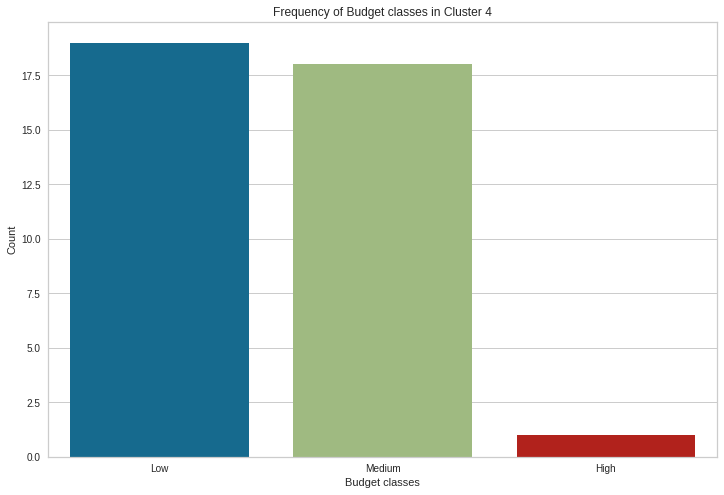

In [376]:
plt.figure(figsize=(12,8))
sns.countplot(df4_kmeans['Budget'])
plt.title('Frequency of Budget classes in Cluster 4')
plt.xlabel('Budget classes')
plt.ylabel('Count')

>  **Frequency of Budget classes in Cluster 5**

Text(0, 0.5, 'Count')

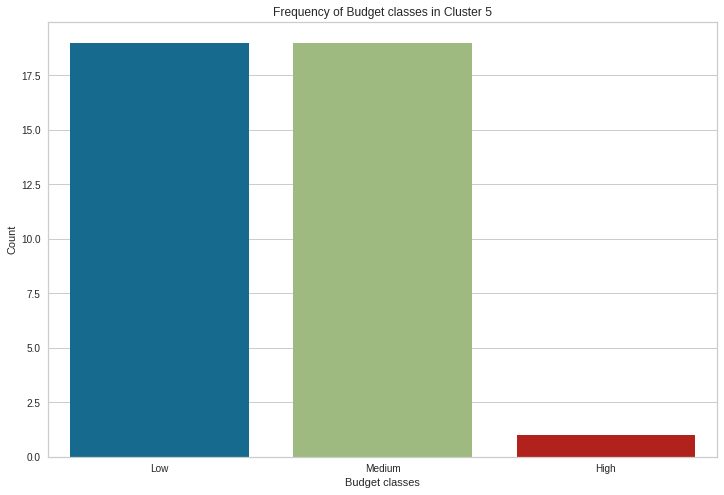

In [377]:
plt.figure(figsize=(12,8))
sns.countplot(df5_kmeans['Budget'])
plt.title('Frequency of Budget classes in Cluster 5')
plt.xlabel('Budget classes')
plt.ylabel('Count')

## Restaurant maps for each cluster using Folium

>  **Here,we are creating folium maps which are centered around Colombo, Sri Lanka.**

> **Create a folium map centered around Colombo, Srilanka**

In [378]:
# Geo co-ordinates for Colombo
lat_colombo = 6.9271
long_colombo =79.8612

Colombo_map=folium.Map(location=[lat_colombo,long_colombo],zoom_start=13)
folium.features.Marker(
(lat_colombo,long_colombo),
popup='Colombo, Capital of Sri Lanka',
icon=folium.Icon(color='red',icon_color='white',icon='male',angle=0,prefix='fa')).add_to(Colombo_map)
Colombo_map

In [379]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 1
location_c1=df1_kmeans[['Latitude','Longitude']]
locationlist_c1=location_c1.values.tolist()
locationlist_c1[0]

[6.8929346, 79.8639527]

> **Explore all Restaurants in cluster 1 around Colombo.**

In [380]:

for point in range(0,len(locationlist_c1)):
    folium.features.Marker(
    locationlist_c1[point],
    popup=df1_kmeans['Name'][point]+', '+ df1_kmeans['CUISINES'][point]+', '+df1_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [381]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 2
location_c2=df2_kmeans[['Latitude','Longitude']]
locationlist_c2=location_c2.values.tolist()
locationlist_c2[0]

[6.0333469, 80.2144181]

> **Explore all Restaurants in cluster 2 around Colombo.**

In [382]:
for point in range(0,len(locationlist_c2)):
    folium.features.Marker(
    locationlist_c2[point],
    popup=df2_kmeans['Name'][point]+', '+ df2_kmeans['CUISINES'][point]+', '+df2_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [383]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 3
location_c3=df3_kmeans[['Latitude','Longitude']]
locationlist_c3=location_c3.values.tolist()
locationlist_c3[0]

[6.9203009, 79.846261]

> **Explore all Restaurants in cluster 3 around Colombo.**

In [384]:
for point in range(0,len(locationlist_c3)):
    folium.features.Marker(
    locationlist_c3[point],
    popup=df3_kmeans['Name'][point]+', '+ df3_kmeans['CUISINES'][point]+', '+df3_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [385]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 4
location_c4=df4_kmeans[['Latitude','Longitude']]
locationlist_c4=location_c4.values.tolist()
locationlist_c4[0]

[6.9025873, 79.8588067]

> **Explore all Restaurants in cluster 4 around Colombo.**

In [386]:
for point in range(0,len(locationlist_c4)):
    folium.features.Marker(
    locationlist_c4[point],
    popup=df4_kmeans['Name'][point]+', '+ df4_kmeans['CUISINES'][point]+', '+df4_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

In [387]:
#Create a list of latitude & longitude pairs for all Restaurants in Cluster 5
location_c5=df5_kmeans[['Latitude','Longitude']]
locationlist_c5=location_c5.values.tolist()
locationlist_c5[0]

[6.9167, 79.85]

> **Explore all Restaurants in cluster 5 around Colombo.**

In [388]:
for point in range(0,len(locationlist_c5)):
    folium.features.Marker(
    locationlist_c5[point],
    popup=df5_kmeans['Name'][point]+', '+ df5_kmeans['CUISINES'][point]+', '+df5_kmeans['SPECIAL DIETS'][point],
    icon=folium.Icon(color='darkblue',icon_color='white',icon='male',angle=0,prefix='fa')
    ).add_to(Colombo_map)
Colombo_map

## Characterstics of each Cluster

> **Some characteristics are unique (shown in bold & italic letters) & some are common among all clusers. Here the order in which the CUISINES, SPECIAL DIETS, Meals, & FEATURES are mentioned is descending based on their occurrencies in respective clusters. High occurrencies of items in CUISINES, SPECIAL DIETS, Meals, & FEATURES are only considered for each cluster.**

## Cluster 1

* CUISINES : Asian, Bar, Sri Lankan, Chinise, Pub, Indian, Seafood, Cafe, International

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options, Halal.

* Meals : Dinner, Lunch, Breakfast.

* FEATURES : Seating, Table service, Reservations, Takeout, Parking available, Serves Alcohol, Outdoor seating, Accepts Credit cards, Wheelchair Accessible.
* Budget : Medium, Low, High

## Cluster 2

* CUISINES : Asian, Sri Lankan, Indian, Chinise, Cafe, FastFood.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options.

* Meals : Dinner, Lunch, Breakfast.

* FEATURES : Seating, Table service, Reservations, Takeout.
* Budget : Low, Medium, High.

## Cluster 3

* CUISINES : Asian, European, Bar, Sri Lankan, Pub, International, Seafood, Chinese, Fusion, Cafe.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options, Halal, **Kosher**.

* Meals : Dinner, Lunch, Late Night, Drinks

* FEATURES : Seves Alcohol, Seating, Reservations, Table Service, Full bar, Wheelchair Accessible, Parking available, Outdoor seating, Validated parking, Highchairs Available.
* Budget : Medium, Low, High.

## Cluster 4

* CUISINES : Asian, Sri Lankan, Cafe, Indian, Chinese, Italian.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options, Halal, Non-veg.

* Meals : Lunch, Dinner, Breakfast.

* FEATURES : Seating, Accepts Visa, Accepts American express, Accepts Master card, Accepts Credit cards, Free off-street parking, Take out, Accepts Discover.
* Budget : Low, Medium, High.

## Cluster 5

* CUISINES : Sri Lankan, Asian, European, Bar, International, Cafe.

* SPECIAL DIETS : Vegetarian Friendly, Vegan options, Gluten Free options, Halal, Non-veg.

* Meals : Dinner, Lunch, Drinks.

* FEATURES : Table service, Accepts Visa, Seating, Reservations, Accepts American Express, Accepts Mastercard,Parking available, Serves Alcohol, Full bar, Wine & Bar.